In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def draw(pct_list, time_num, legend_loc='upper center'):  # 绘制不同仓位比例情况下的收益曲线
    global win_ratio, lose_ratio, bet_ratio
    np.random.seed(1001)
    
    random_flip = np.random.randint(0, 100, time_num)
    pivotal_val = int(100 * win_ratio)

    final_return_list = []
    for pct in pct_list:
        win_lose_ratios = np.where(random_flip < pivotal_val, 
                          1 + pct*bet_ratio, 1 - pct*1)
        win_lose_ratios = np.concatenate([[1.0], win_lose_ratios])
        return_arr = win_lose_ratios.cumprod()
        final_return_list.append(return_arr[-1])
        plt.plot(return_arr)
    plt.legend([str(pct) for pct in pct_list], loc=legend_loc)
    plt.title('time_num={}'.format(time_num))
    plt.show()
    
    for pct, ret in zip(pct_list, final_return_list):
        print('return({0})={1}'.format(pct, round(ret, 8)), end=' ')

kelly ratio is:  0.0667


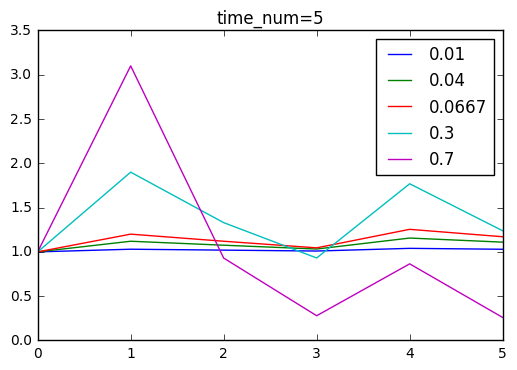

return(0.01)=1.02939021 return(0.04)=1.10981284 return(0.0667)=1.17084301 return(0.3)=1.23823 return(0.7)=0.25947 

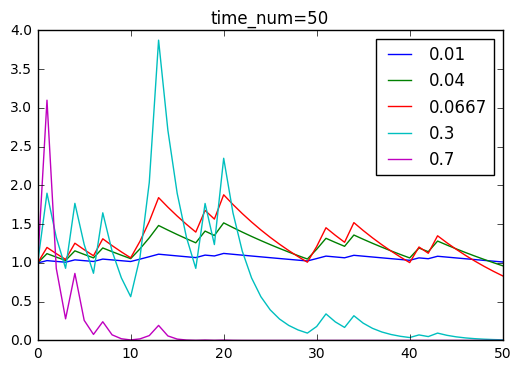

return(0.01)=1.01247923 return(0.04)=0.96354037 return(0.0667)=0.83293958 return(0.3)=0.00780592 return(0.7)=0.0 

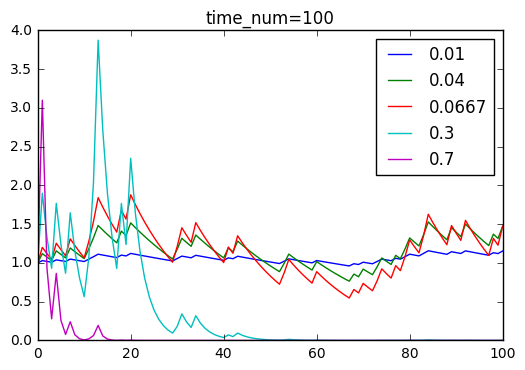

return(0.01)=1.15445852 return(0.04)=1.47428078 return(0.0667)=1.47507978 return(0.3)=0.00121847 return(0.7)=0.0 

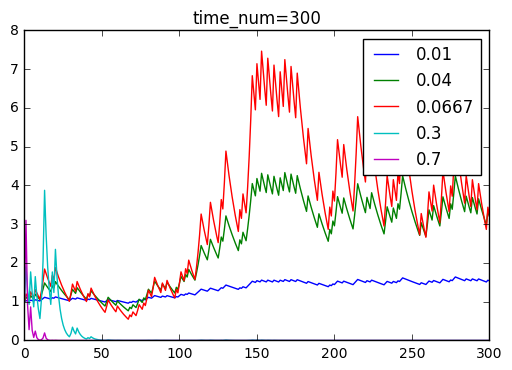

return(0.01)=1.53863284 return(0.04)=3.20435489 return(0.0667)=3.20956763 return(0.3)=0.0 return(0.7)=0.0 

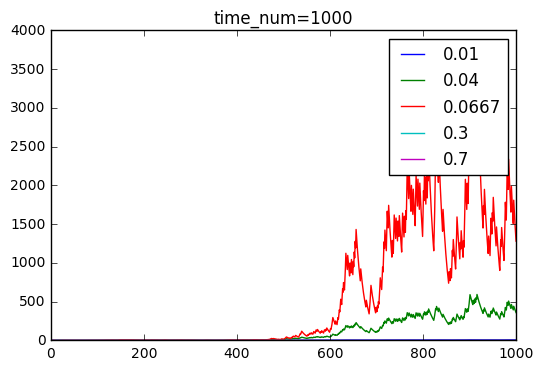

return(0.01)=7.03735922 return(0.04)=359.84071219 return(0.0667)=1281.46076449 return(0.3)=0.0 return(0.7)=0.0 

In [3]:
win_ratio = 0.3               #胜率
lose_ratio = 1 - win_ratio    #败率
bet_ratio = 3.0/1.0           #赔率

kelly_ratio = (bet_ratio*win_ratio - lose_ratio)/bet_ratio  #凯利公式
print('kelly ratio is: ', round(kelly_ratio, 4))

position_percentages = [0.01, 0.04, 0.0667, 0.3, 0.7]

draw(position_percentages, 5, 'upper right')
draw(position_percentages, 50, 'upper right')
draw(position_percentages, 100, 'upper right')
draw(position_percentages, 300, 'upper right')
draw(position_percentages, 1000, 'upper right')